# Dogs vs. Cats Prediction Problem
* https://www.tensorflow.org/tutorials/images/cnn
* https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

In [1]:
import numpy as np

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
import matplotlib.pyplot as plt

## Dataset

Download and prepare CIFAR 10 dataset

In [3]:
(train_images_i, train_labels_i), (test_images_i, test_labels_i) = datasets.cifar10.load_data()

Normalize pixel values to [0, 1]

In [4]:
train_images_i, test_images_i = train_images_i/255.0, test_images_i/255.

Get the cats and dog images only

In [5]:
# ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def extract_model_data(images_i, labels_i):
    images = []
    labels = []

    for elem_image, elem_label in zip(images_i, labels_i):
        if elem_label[0] == 3 or elem_label[0] == 5:
            images.append(elem_image)
            if elem_label[0] == 3:
                labels.append(0)
            else:
                labels.append(1)
                
    return images, labels

In [6]:
train_images, train_labels = extract_model_data(train_images_i, train_labels_i)
train_images = np.array(train_images)
train_labels = np.array(train_labels).astype(int)

In [7]:
test_images, test_labels = extract_model_data(test_images_i, test_labels_i)
test_images = np.array(test_images)
test_labels = np.array(test_labels).astype(int)

Verify the data

In [8]:
class_names = ['cat', 'dog']

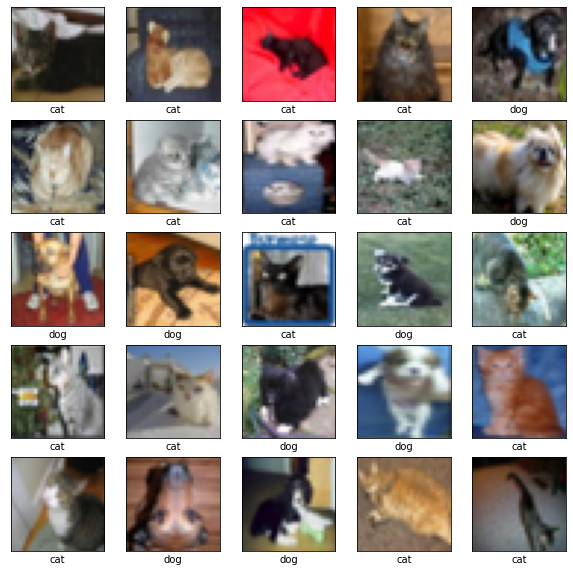

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

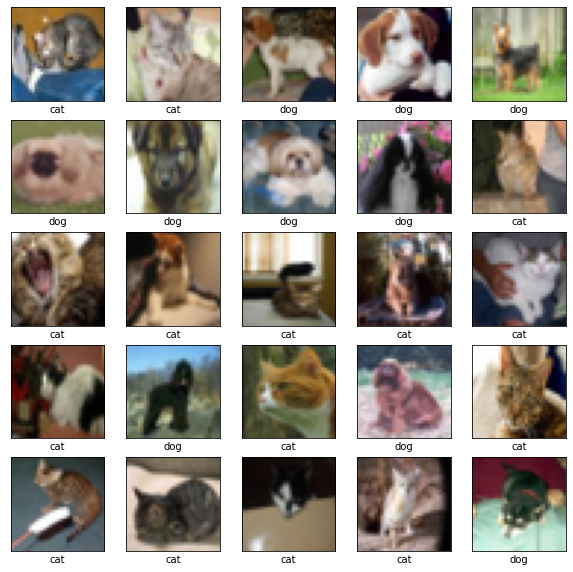

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

## Base Model

In [11]:
model = models.Sequential([
    layers.Input(shape=(32,32,3)),
    layers.Conv2D(32, (3,3), padding = "same",
                  kernel_initializer = tf.keras.initializers.he_uniform,
                  activation = tf.keras.activations.relu),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(units=128,
                 kernel_initializer = tf.keras.initializers.he_uniform,
                 activation=tf.keras.activations.relu),
    layers.Dense(units=1, activation=tf.keras.activations.sigmoid)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,049,729
Trainable params: 1,049,729
Non-trainable params: 0
_________________________________________________________________


Compile and train the model

In [13]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=0.9),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=[tf.keras.metrics.BinaryAccuracy()])

In [14]:
history = model.fit(train_images, train_labels, epochs=30,
                   validation_data=(test_images, test_labels)
                   )

Epoch 1/30
313/313 [==============================] - 4s 13ms/step - loss: 0.6768 - binary_accuracy: 0.5733 - val_loss: 0.6608 - val_binary_accuracy: 0.6035
Epoch 2/30
313/313 [==============================] - 4s 14ms/step - loss: 0.6570 - binary_accuracy: 0.6047 - val_loss: 0.6522 - val_binary_accuracy: 0.6200
Epoch 3/30
313/313 [==============================] - 4s 13ms/step - loss: 0.6499 - binary_accuracy: 0.6124 - val_loss: 0.6518 - val_binary_accuracy: 0.6135
Epoch 4/30
313/313 [==============================] - 4s 13ms/step - loss: 0.6358 - binary_accuracy: 0.6351 - val_loss: 0.6368 - val_binary_accuracy: 0.6375
Epoch 5/30
313/313 [==============================] - 4s 14ms/step - loss: 0.6233 - binary_accuracy: 0.6477 - val_loss: 0.6275 - val_binary_accuracy: 0.6565
Epoch 6/30
313/313 [==============================] - 4s 12ms/step - loss: 0.6135 - binary_accuracy: 0.6600 - val_loss: 0.6559 - val_binary_accuracy: 0.6040
Epoch 7/30
313/313 [==============================] - 4s 1

Evaluate the model

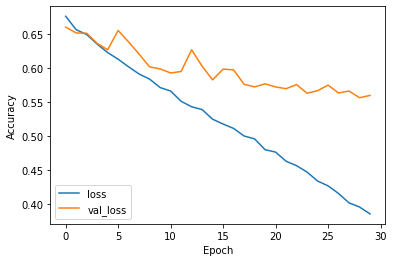

In [15]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

63/63 - 0s - loss: 0.5601 - binary_accuracy: 0.7145


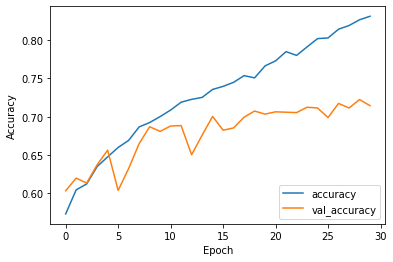

In [18]:
plt.plot(history.history['binary_accuracy'], label = 'accuracy')
plt.plot(history.history['val_binary_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')